### Introduction

Walmart is one of the largest retail chains in the world. Accurately predicting sales can help the company manage inventory, allocate resources, and operate more efficiently as a large company. This data science project explores the Walmart dataset from Kaggle, which covers Walmart's weekly sales from 2010-02-05 to 2012-11-01.The focus of this project is to understand the data, specifically how each of the provided features affect weekly sales, and further create a predictive model with the target of weekly sales. The insights derived from this project will help Walmart in making data-driven decisions. 

- *here is a [link](https://www.kaggle.com/datasets/yasserh/walmart-dataset) to the dataset on Kaggle.*

There are two goals of this project, one is to create a comprehensive predictive model with the ability to forecast weekly sales based on the data provided, the second is to break down the data to understand it ourselves and make better business decisions in the future. 

**Objectives:**

- Analyse historical data from different Walmart stores.
- Find and understand key features influencing sales. 
- Create predictive model capable of forecasting weekly sales. 

The project will use several data science techniques like data cleaning, exploratory data analysis (EDA) and machine learning, including models like Decision Tree, Random Forest, Ridge Regression and Lasso Regression. Model performance will be evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R2) scores.

--- 
**Note:** This is just a portfolio project and I don't have any real work with Walmart and they don't use it.

In [8]:
# importing necessary libraries  
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

df = pd.read_csv("./Walmart.csv",parse_dates=['Date'], dayfirst=True)
display(df.shape)
display(df.head())

(6435, 8)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


##### About data cleaning 
As we can see below, there are no null values in the dataset, so we will stop the data cleaning for now and return to it in the data preprocessing for the ML model, because we will still have to address outliers.

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


### Data visualization 

##### Relations between all the features

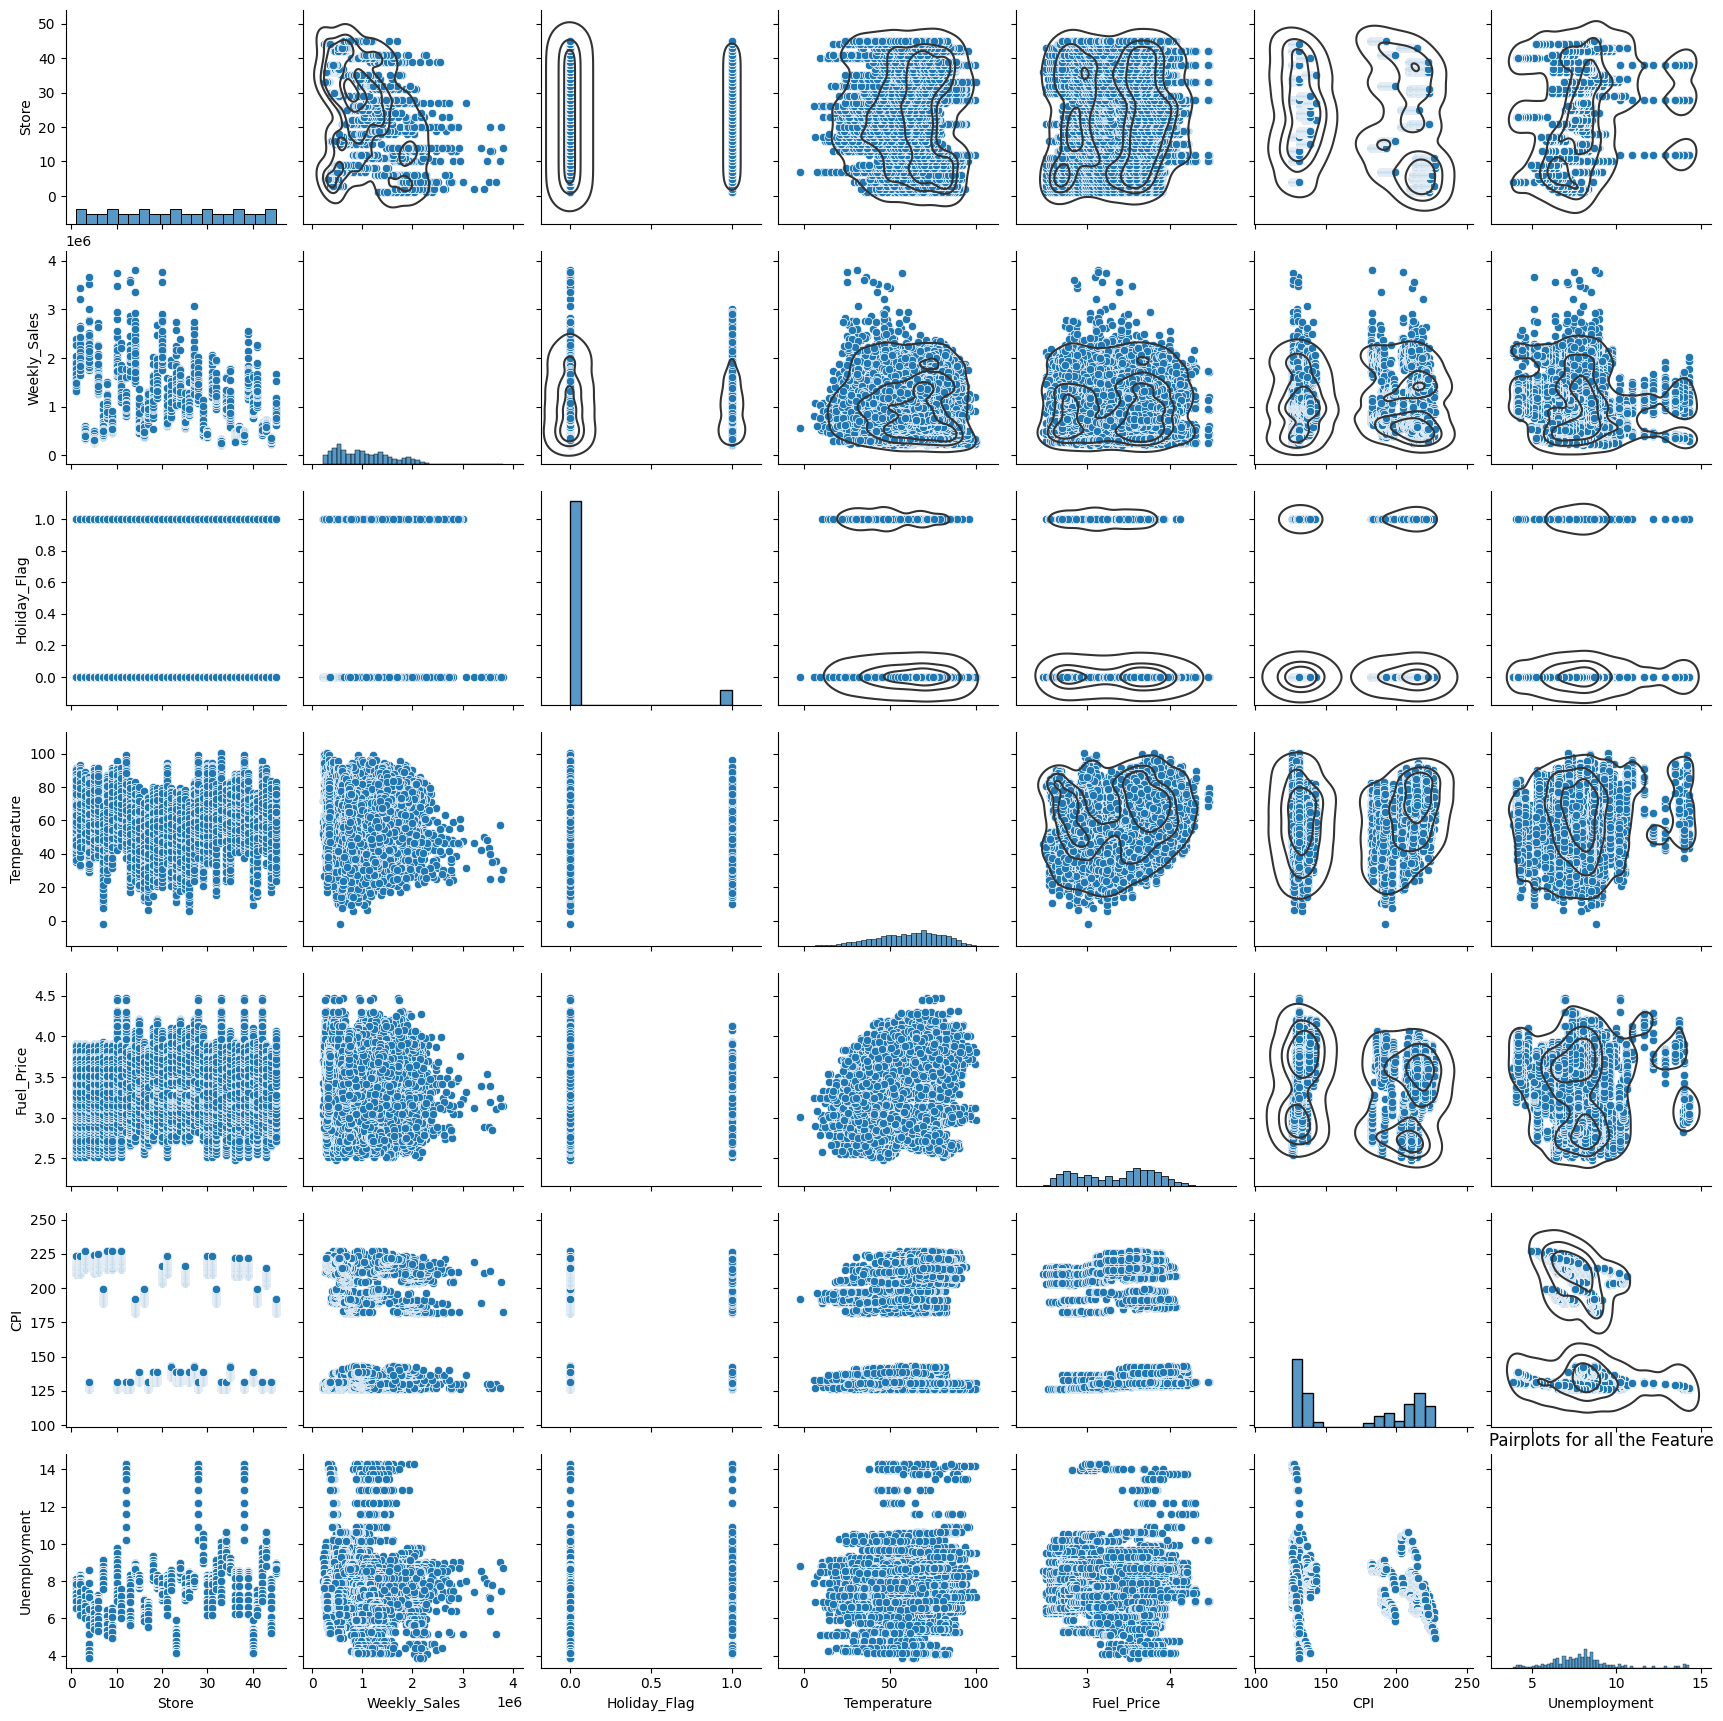

In [4]:
# creating pair plots for all features
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**On the pair plot we can't really see any linear correlations between variables, however some of the plots represent interesteting clusters and vizualisations connected with our target ( weekly sales ), which will be described and vizualised below in detail.**

##### Fuel Price and Weekly Sales Plot

**This scatterplot is the visualisation of the possible relationship between two variables, fuel price (x-axis) and weekly sales (y-axis). The purpose of this plot is to show potential relationship between two variables.**

- On the plot we can see two clusters of data, one is between 2.50 and 2.80, the second is between 3.50 and 4.00 on the x axis, these clusters tell us about the amount of data points concentrated in these areas, this statement doesn't influence our predictions about the weekly sales. 

- However, what is important to note is the amount of data points with higher sales between the fuel price marks of 2.75 and 3.60, although we can't really fit a clear correlation line through all of the data points, we can still say that the lower the fuel price, the higher the weekly sales. This statement can be confirmed by the 2015 Federal Reserve Bank of Dallas study "The Relationship Between Gasoline Prices and Consumer Spending", which clearly states that lower fuel prices generally mean that consumers spend less on transportation, which can increase their disposable income. This additional disposable income can lead to increased spending on goods and services, including retail products. 

National Bureau of Economic Research also spotted realtionship between gasoline prices and consumer spending in their 2011 research ( this year is more relevant for our dataset ) "Gasoline Prices and Consumer Spending: A Comparison of Household Data and Aggregate Retail Sales", they highlighted that decrease in gasoline prices tend to increase overall consumer spending. In general, people will spend less on petrol to get to the store and potentially spend more in the store, especially the transport part is important in the case of Walmart, whose stores are usually only conveniently accessible by car or bus. In addition, for large retailers such as Walmart, the price of fuel is influancial to their expenses; lower fuel prices reduce transportation and logistics costs. This can lead to cost savings in inventory management and distribution, potentially improving profit margins.
 
These studies and conclusions confirm that the price of fuel is an important variable affecting weekly sales, and it's a good thing to keep in mind, but it's not the only variable, the relationship between fuel prices and retail sales, especially for large retailers like Walmart, is complex and influenced by multiple factors ( plot doesn't show us clear correlation too ). Many variables, including those in this dataset, provide significant importance to the amount of weekly sales. 

**What can be done?**
- Since the data shows a clustering of higher sales when fuel prices are between $2.75 and $3.60, the company should focus on aggressive marketing campaigns and promotions when fuel prices fall within this range.
- With lower fuel prices reducing transportation and logistics costs, the company can reinvest these savings into further improving the supply chain efficiency. 

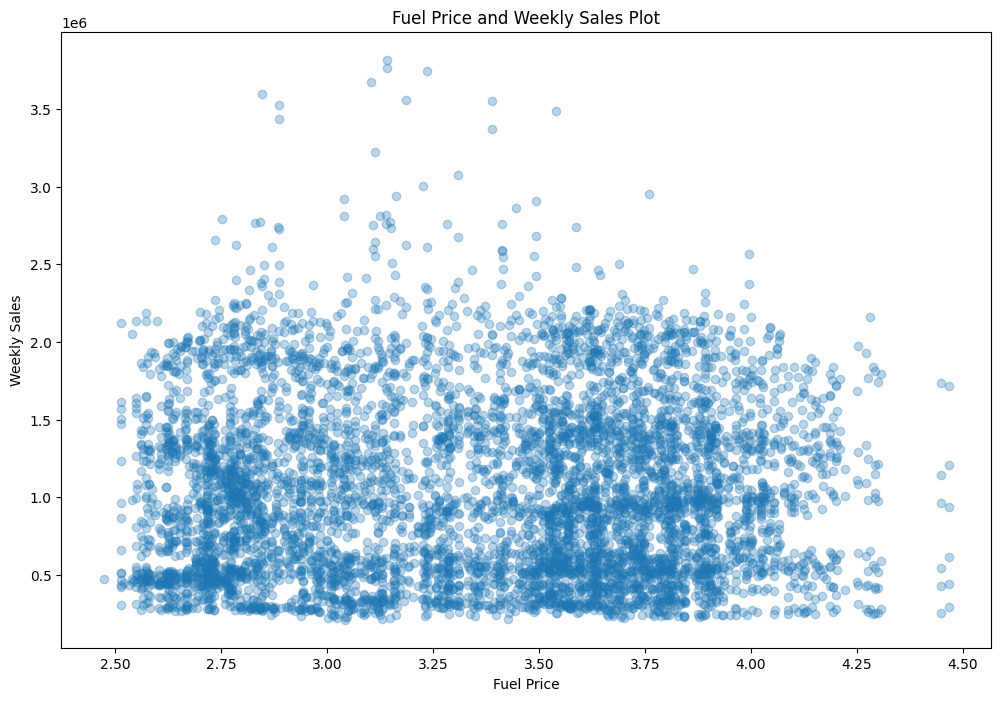

In [27]:
# creating scatter plot 
plt.figure(figsize=(12,8))
plt.scatter(df['Fuel_Price'],df['Weekly_Sales'], alpha=0.3)
plt.title('Fuel Price and Weekly Sales Plot')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

##### Temperature and Weekly Sales Plot

**This scatterplot visualises the possible relationship between two variables, temperature in degrees Fahrenheit (x-axis) and weekly sales (y-axis). The purpose of this graph is to examine the effect of temperature on weekly revenue.**

- There is a high density of data points on the right hand side of the plot, roughly between 40 and 85 on the x-axis, again this doesn't really affect our conclusions from the plot, but what does is the amount of data points representing higher weekly sales between 40 and 55 on the x-axis, this can potentially mean that sales will be higher in this range of temperature. 

One of the reasons for this relationship is that on average people spend more in winter (when the tempreture is lowest) and for retailers such as Walmart who sell a variety of goods such as clothes (on average winter clothes are much more expensive than summer clothes) this can be quite influancial. Above the "Temperature and Weekly Sales Plot" you will find a bar chart showing weekly sales and seasons. 
- According to USAFacts Americans spend an average of $430 billion on retail during December, at least $69 billion more than in any other month. And the first figure below confirms that, on average, sales are higher in winter for this Walmart dataset.

**What can be done?**

- In the winter season, the company can focus on promoting and storing more winter products. 
- Develop marketing campaigns that highlight winter products and seasonal deals, particularly in regions that experience significant winter temperatures.
- Think about promoting more non-durable seasonal items, as these are the things people buy every year. 


,season,Weekly_Sales
0,Fall,1.576562e+09
1,Spring,1.796771e+09
2,Summer,1.885721e+09
3,Winter,1.478165e+09


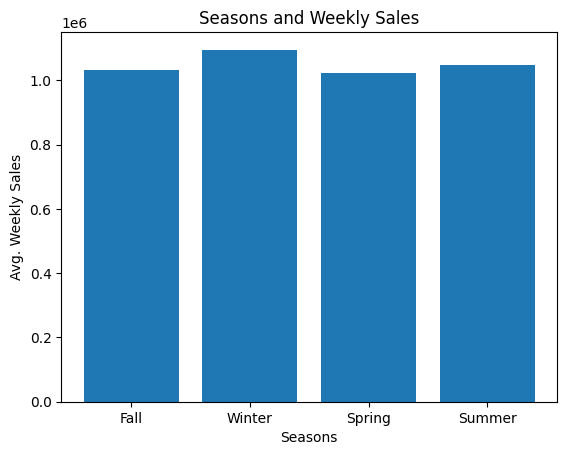

In [3]:
# creating copy of the dataset for these specific manipulations
df3 = df.copy().reset_index()
df3['month'] = df3['Date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# creating and getting season columns
df3['season'] = df3['month'].apply(get_season)
sum_s = df3.groupby('season')['Weekly_Sales'].sum().reset_index()
display(sum_s)

# counting average of each season 
mean_fall = sum_s['Weekly_Sales'][0]/(df3['season'].value_counts()['Fall'])
mean_spring = sum_s['Weekly_Sales'][1]/(df3['season'].value_counts()['Spring'])
mean_summer = sum_s['Weekly_Sales'][2]/(df3['season'].value_counts()['Summer'])
mean_winter = sum_s['Weekly_Sales'][3]/(df3['season'].value_counts()['Winter'])

s_ws = {
    "season": ['Fall', 'Winter', 'Spring', 'Summer'],
    "Avg. weekly sales": [mean_fall, mean_winter, mean_spring, mean_summer]
}
s_ws_df = pd.DataFrame(s_ws)

# creating bar chart 
plt.bar(s_ws_df['season'], s_ws_df['Avg. weekly sales'])
plt.title("Seasons and Weekly Sales")
plt.xlabel('Seasons')
plt.ylabel('Avg. Weekly Sales')
plt.show()


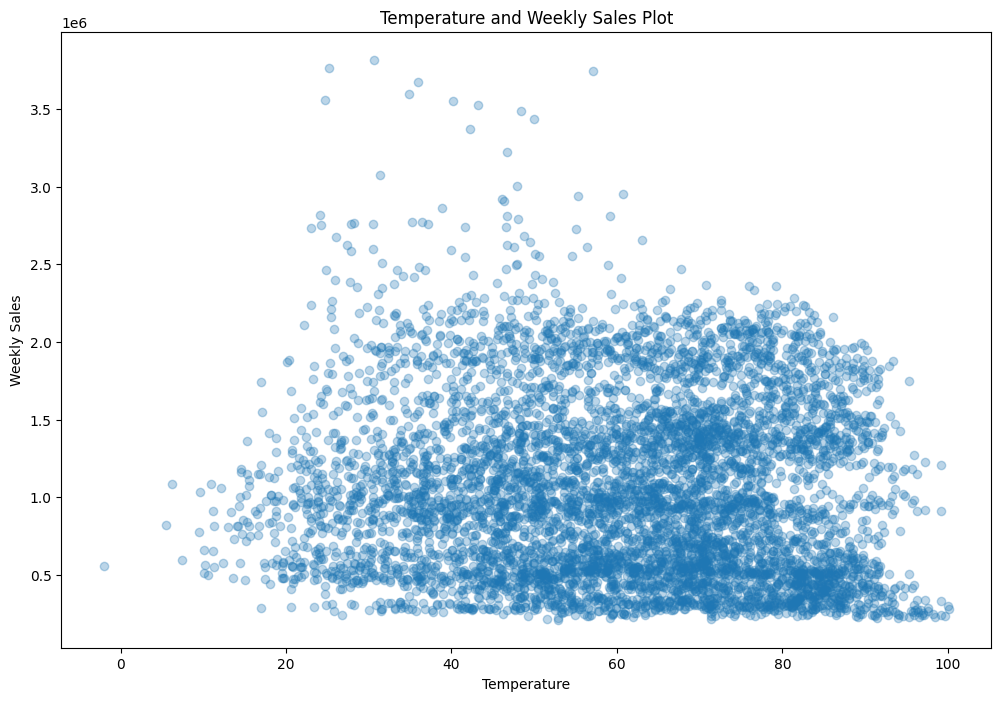

In [ ]:
# creating scatter plot
plt.figure(figsize=(12,8))
plt.scatter(df['Temperature'],df['Weekly_Sales'], alpha=0.3)
plt.title('Temperature and Weekly Sales Plot')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

##### Holiday Flag ( Whether the week is a special holiday week ) and Weekly Sales Plot

**This bar chart shows us whether average weekly sales are higher in the holiday week than in the normal week. The purpose of this chart is to determine are holiday weeks higher in sales than regular weeks.**

Looking at the bar chart, we can see that average weekly sales in holiday weeks are higher than in normal weeks, the reason being that most people will spend more in the holiday period to meet their needs in buying food and presents. Interestingly, this finding also correlates with the fact that the average person in the US spends the most on winter holidays, especially Christmas and as we mentioned before, people tend to spend more in the winter. 

**What can be done?**
- Before the holiday week, Walmart should focus on promoting and selling products relevant to the holiday. 
- Ensure that high-demand holiday items (e.g., gifts, decorations, winter clothing) are well-stocked to prevent stockouts.
- During holidays company can provide more offers for customers, e.g free shipping, discounts and etc. 
- Outside of the holiday period (as this is the time when sales are lower on average), they should focus on other aspects that affect their revenue. 
- Enhance the loyalty program to offer points for every purchase, which can be redeemed for discounts or free products.





In [5]:
sum_hf_ws = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

**We have more of none holiday flag weeks and that is why we can't make a fair bar plot, so below we compare average weekly sales of none holiday flag week with average weekly sales of holiday flag week.**

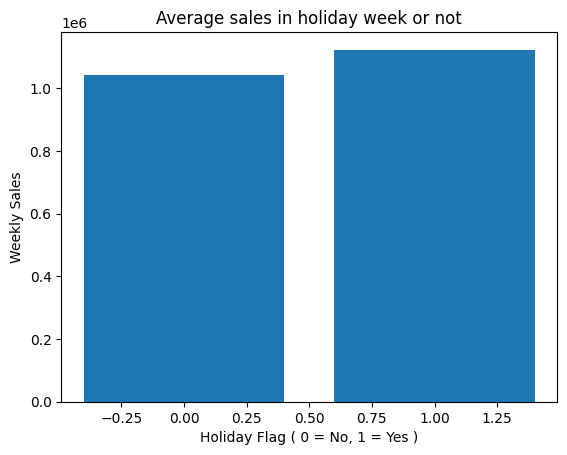

In [7]:
# counting average 
mean_hl_false = sum_hf_ws['Weekly_Sales'][0]/(df['Holiday_Flag'].value_counts()[0])
mean_hl_true = sum_hf_ws['Weekly_Sales'][1]/(df['Holiday_Flag'].value_counts()[1])

# creating new dataframe for further plot
sw_hl = {
    "holiday flag": [0, 1],
    "mean sales": [mean_hl_false, mean_hl_true]
}

sw_hl_df = pd.DataFrame(sw_hl)

# creating bar chart
plt.bar(sw_hl['holiday flag'], sw_hl['mean sales'])
plt.title("Average sales in holiday week or not")
plt.xlabel("Holiday Flag ( 0 = No, 1 = Yes )")
plt.ylabel("Weekly Sales")
plt.show()


##### Unemployment and Weekly Sales Plot

**This scatter plot represents correlation between weekly sales and unemployment rate. The purpose of this plot is to understand how an important economical metric affects Walmart's weekly sales.**

The unemployment rate is an important metric in economics that shows how many people who can work aren't working, and as we might expect, with fewer people working, there's less money being spent at retailers like Walmart, and the scatter plot below confirms this.
 
- On the plot we clearly can see a cluster of data points between unemployment rate of 4 and 10, comparing this cluster with data points on the right we can clearly say that on average weekly sales are higher when unemployment is lower. 

**What can be done?**

-  Increase the frequency and visibility of discounts, sales, and promotions to attract price-sensitive consumers.
-  Offer bulk purchasing deals on essential items to provide cost savings for customers.
-  Ensure that essential goods are well-stocked and fairly priced.
- Partner with government agencies to develop comprehensive training programs for retail skills
- During peak seasons, such as the holiday period, increase the number of temporary job opportunities


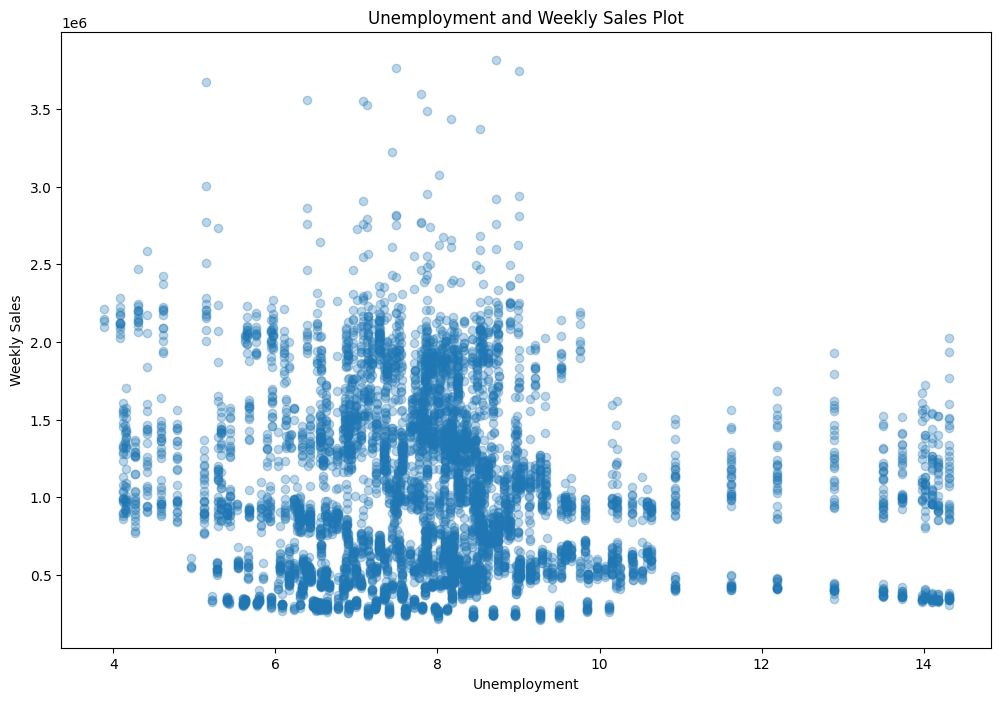

In [12]:
# creating scatter plot
plt.figure(figsize=(12,8))
plt.scatter(df['Unemployment'],df['Weekly_Sales'], alpha=0.3)
plt.title('Unemployment and Weekly Sales Plot')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

##### Stores and Weekly Sales

**This chart shows average sales per store (which is also identified as the most important feature by the Random Forest prediction model.). The purpose of this chart is to find the best performing store and, in the future, address potential reasons for its success.**

- The store with the lowest total weekly sales is number 33. 
- Stores with highest total weekly sales are 20th , 4th and 14th

Reasons why some shops outperform others can include the location of the shop, as this affects its visibility (for example, if your shop is in a place where many people pass by, more people will see it and eventually go there), demographics or target audience, as different people with different needs and priorities will go to the shop and spend more or less money. In addition, the products sold in the stores can vary from store to store and be more valuable to the target audience in each store, affecting total sales. 

**What can be done?**

- The exact reasons for the poor performance of the worst shops can be addressed and changed. 
- Walmart can analyse the demographics of each store and provide more appropriate products for each. 
- If the location is the main issue, the company can focus on improving various aspects of the store, such as providing better in-store service, selling products that are better suited to the area, offering more discounts and offers if needed. 
- Walmart can reduce expenses for some stores if it is accessible to do. 

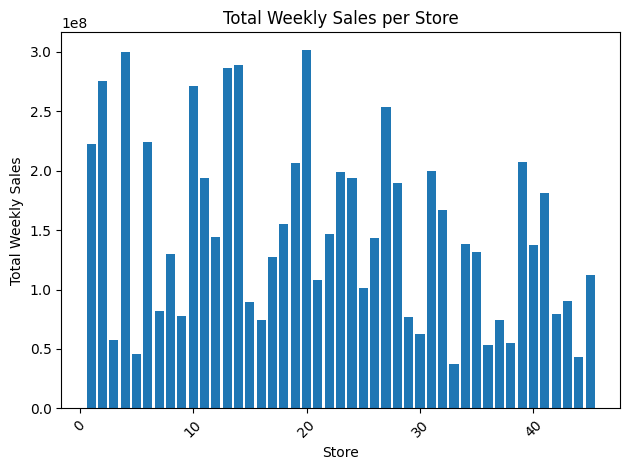

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [7]:
# grouping
shop_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# creating bar chart
plt.bar(data=shop_sales, x='Store', height='Weekly_Sales')
plt.title('Total Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# displaying table with stores
shop_sales = shop_sales.sort_values(by='Weekly_Sales', ascending=False)
shop_sales

### Data preprocessing

In [12]:
# creating copy of the dataset for further preprocessing
df_p = df.copy().reset_index()

target = 'Weekly_Sales'
features = [col for col in df_p.columns if col != target]

# extracting month and year columns, as the date itself doesn't give any valuable info for the model
df_p['month'] = df_p['Date'].dt.month
df_p['year'] = df_p['Date'].dt.year
display(df_p.shape)
display(df_p.head())

(6435, 10)

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


##### Outlier removal

In [14]:
# removing outliers using quartiles to improve the accuracy and stability of the model. 
for i in features:
    Q1 = df_p[i].quantile(0.25)
    Q3 = df_p[i].quantile(0.75)
    IQR = Q3 - Q1
    df_p = df_p[df_p[i] <= (Q3+(1.5*IQR))]
    df_p = df_p[df_p[i] >= (Q1-(1.5*IQR))]
    df_p = df_p.reset_index(drop=True)

df_p.drop(['Date'], axis=1, inplace=True) # dropping date column
df_p.shape

(5461, 9)

### Predictive model creation
- Linear models perfomed the worst on the whole dataset
- The best model turned out to be Random Forest and below you will find a function which will return prediction of weekly sales based on other features

In [15]:
# importing necessary libraries  
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# splitting data 
X = df_p.drop(columns=['Weekly_Sales'])
y = df_p['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Decision Tree

In [9]:
# creating, training and testing decision tree regression model
decision_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=7, min_samples_split=5)
decision_tree.fit(X_train, y_train)

y_pred_tree_train = decision_tree.predict(X_train)
y_pred_tree = decision_tree.predict(X_test)

# evaluating model's performance 
mse_tree_train = mean_squared_error(y_train, y_pred_tree_train)
r2_tree_train = r2_score(y_train, y_pred_tree_train)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree ME train: {np.sqrt(mse_tree_train)}')
print(f'Decision Tree R2 Score train: {r2_tree_train}')
print(f'Decision Tree ME test: {np.sqrt(mse_tree)}')
print(f'Decision Tree R2 Score test: {r2_tree}')

Decision Tree ME train: 96382.46720487066
Decision Tree R2 Score train: 0.9708996365394212
Decision Tree ME test: 117101.22364309104
Decision Tree R2 Score test: 0.956867830725392


##### Random Forest Regressor

In [21]:
# creating, training and testing random forest regression model
rfr = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=4,min_samples_split=10 , random_state=42)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
y_pred_rfr_train = rfr.predict(X_train)

# evaluating model's performance 
mse_rfr_train = mean_squared_error(y_train, y_pred_rfr_train)
r2_rfr_train = r2_score(y_train, y_pred_rfr_train)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print(f'Random Forest ME train: {np.sqrt(mse_rfr_train)}')
print(f'Random Forest R2 Score train: {r2_rfr_train}')
print(f'Random Forest ME test: {np.sqrt(mse_rfr)}')
print(f'Random Forest R2 Score test: {r2_rfr}')


Random Forest ME train: 89713.75552173007
Random Forest R2 Score train: 0.9745379737648985
Random Forest ME test: 111367.7362363656
Random Forest R2 Score test: 0.9631252485939784


**Make new prediction using Random Forest regressor.**

In [23]:
# make new prediction
def make_new_prediction(data): 
    prediction = rfr.predict(data)
    return prediction

# example 
new_data = pd.DataFrame({
    "Store": 8,
    "Holiday_Flag": 0,
    "Temperature": 70.91,
    "Fuel_Price": 5.1,
    "CPI": 313.05,
    "Unemployment": 4.1,
    "month": 7,
    "year": 2024
}, index=[0])

# making new prediction based on example data
print(f"Here is the estimated weekly sales: {make_new_prediction(new_data)}")


Here is the estimated weekly sales: [894771.70878593]


##### Ridge Regression

In [38]:
# creating, training and testing ridge regression model
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
y_pred_ridge_train = ridge.predict(X_train)

# evaluating model's performance 
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge ME train: {np.sqrt(mse_ridge_train)}')
print(f'Ridge R2 Score train: {r2_ridge_train}')
print(f'Ridge ME test: {np.sqrt(mse_ridge)}')
print(f'Ridge R2 Score test: {r2_ridge}')





Ridge ME train: 521404.5370916674
Ridge R2 Score train: 0.13736303182131215
Ridge ME test: 541539.7236603608
Ridge R2 Score test: 0.11899082220302026


##### Lasso Regression

In [53]:
# creating, training and testing lasso regression model
lasso = linear_model.Lasso(alpha=10)

lasso.fit(X_train, y_train)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

# evaluating model's performance 
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso ME train: {np.sqrt(mse_lasso_train)}')
print(f'Lasso R2 Score train: {r2_lasso_train}')
print(f'Lasso ME test: {np.sqrt(mse_lasso)}')
print(f'Lasso R2 Score test: {r2_lasso}')

Lasso ME train: 521404.1340737564
Lasso R2 Score train: 0.13736436536557506
Lasso ME test: 541507.8502514574
Lasso R2 Score test: 0.11909452628296024


### Feature importance using random forest

- Understand which features are important for the model to make predictions, as this can help us to understand the variables that affect sales ourselves. 

In [12]:
feature_importance = rfr.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

feature_importances_df = feature_importances_df[feature_importances_df.Importance != 0]

print(feature_importances_df)

        Feature  Importance
0         Store    0.684164
4           CPI    0.187894
5  Unemployment    0.077972
6         month    0.037612
2   Temperature    0.007265
3    Fuel_Price    0.004396
7          year    0.000697
